### SOSE landmasking

Based on observations from B-SOSE (http://sose.ucsd.edu/)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/home/users/birgal/')
from nemo_python.utils import fix_lon_range

Load files

In [2]:
# File locations on Jasmin:
folder_SOSE = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/B-SOSE/'
folder_NEMO = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/bathymetry/'

# Load files:
nemo = xr.open_dataset(f'{folder_NEMO}coordinates_AIS.nc').squeeze()
nemo_mask = xr.open_dataset(f'{folder_NEMO}mesh_mask-20231025.nc')
sose      = xr.open_dataset(f'{folder_SOSE}climatology/SALT_climatology_m01.nc')
domcfg    = xr.open_dataset(f'{folder_NEMO}domain_cfg-20231025.nc')

nemo_depths = nemo_mask.nav_lev.values

In [3]:
name_remapping = {'XC':'lon', 'YC':'lat', 'Z':'depth'}
SOSE_salt = xr.open_dataset(f'{folder_SOSE}/Salt_bsoseI139_2013to2021_5dy.nc').rename(name_remapping).sel(lat=slice(-90, -48)).isel(time=0)
SOSE_temp = xr.open_dataset(f'{folder_SOSE}/Theta_bsoseI139_2013to2021_5dy.nc').rename(name_remapping).sel(lat=slice(-90, -48)).isel(time=0)

# Convert longitudes from 0-360 to -180 to 180 
SOSE_salt['lon'] = fix_lon_range(SOSE_salt.lon)
SOSE_temp['lon'] = fix_lon_range(SOSE_temp.lon)
SOSE_salt = SOSE_salt.sortby('lon')
SOSE_temp = SOSE_temp.sortby('lon')

#### Figures

In [25]:
# count the number of instances at each depth level where SALT = 0 and hFacC > 0:
for dl in range(SOSE_salt.depth.size):
    count_nonmasked = sum(sum((SOSE_salt.SALT.isel(depth=dl).values == 0)*(SOSE_salt.hFacC.isel(depth=dl).values > 0)))
    if count_nonmasked != 0:
        print(f'Depth level: {dl}, unmasked values that have zero salinity: {count_nonmasked}')

Depth level: 26, unmasked values that have zero salinity: 13
Depth level: 27, unmasked values that have zero salinity: 13
Depth level: 28, unmasked values that have zero salinity: 12
Depth level: 29, unmasked values that have zero salinity: 11
Depth level: 30, unmasked values that have zero salinity: 9
Depth level: 31, unmasked values that have zero salinity: 5
Depth level: 32, unmasked values that have zero salinity: 2


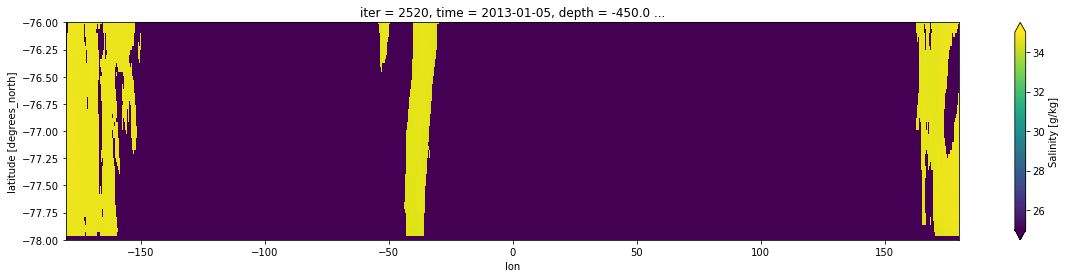

In [4]:
# no masking:
dl=28 # depth level
SOSE_salt.SALT.isel(depth=dl).plot(figsize=(20, 4), vmin=25, vmax=35, ylim=(-78, -76))

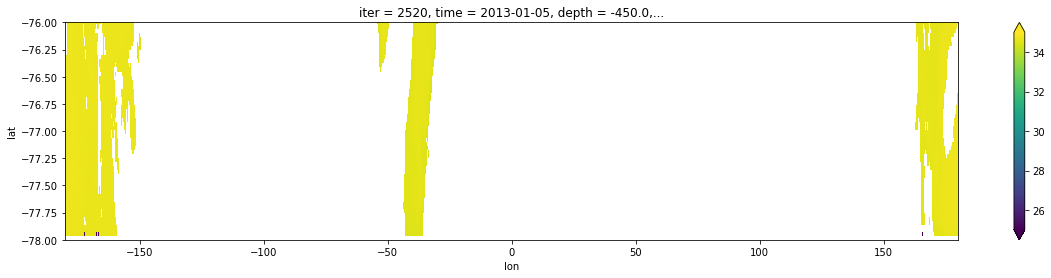

In [7]:
# masking with NaNs based on hFacC:
dl=28 # depth level
SOSE_plot = xr.where(SOSE_salt.hFacC.isel(depth=dl) > 0, SOSE_salt.SALT.isel(depth=dl), np.nan)
SOSE_plot.plot(figsize=(20, 4), vmin=25, vmax=35, ylim=(-78, -76))

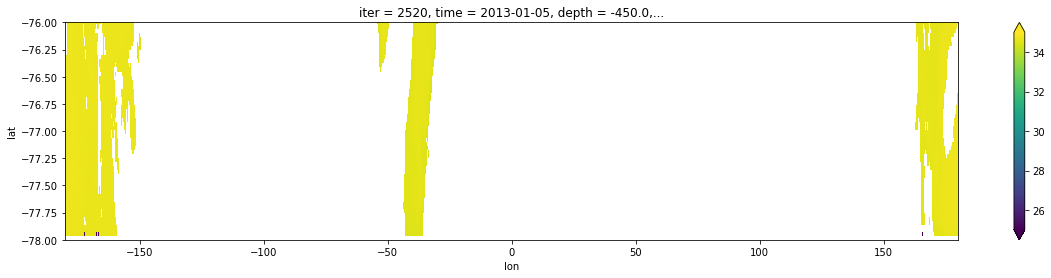

In [20]:
# masking based on maskC:
dl=28 # depth level
SOSE_plot = xr.where(SOSE_salt.maskC.isel(depth=dl)==1, SOSE_salt.SALT.isel(depth=dl), np.nan)
SOSE_plot.plot(figsize=(20, 4), vmin=25, vmax=35, ylim=(-78, -76))

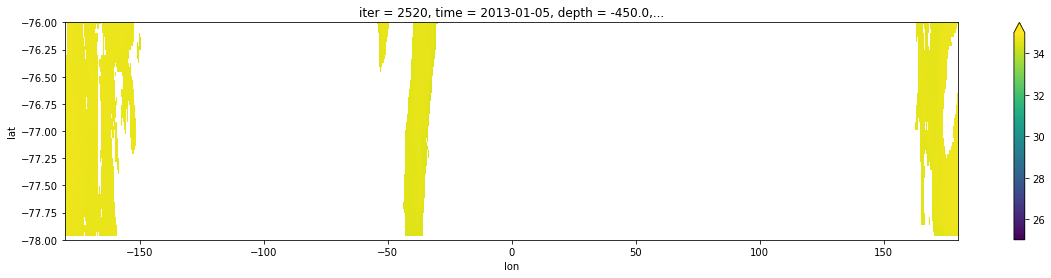

In [21]:
# if I instead mask zeros as well, I get:
dl=28 # depth level
SOSE_plot = xr.where(SOSE_salt.hFacC.isel(depth=dl)==1, SOSE_salt.SALT.isel(depth=dl), np.nan)
SOSE_plot = xr.where(SOSE_plot==0, np.nan, SOSE_plot)
SOSE_plot.plot(figsize=(20, 4), vmin=25, vmax=35, ylim=(-78, -76))